In [29]:
from __future__ import division
import pandas as pd
import numpy as np

# LECTURE 1 GROUPBY

No corresponding lecture notes

In [2]:
# We talked about pivot tables, but we also have a groupby function that is very powerful and performs 
# similar operations
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'val1':np.random.randn(5),
                   'val2':np.random.randn(5)})
df

,cat1,cat2,val1,val2
0,X,alpha,1.559749,-1.210147
1,X,beta,1.210962,-0.864959
2,Y,alpha,-0.055130,-1.446385
3,Y,beta,-0.376073,0.115828
4,Z,alpha,-0.167688,-0.829516


In [3]:
group = df['val1'].groupby(df['cat1'])
group

In [7]:
group=df.groupby("cat1")["val1"]
group

In [4]:
group.describe()

cat1       
X     count    2.000000
      mean     1.385355
      std      0.246630
      min      1.210962
      25%      1.298159
      50%      1.385355
      75%      1.472552
      max      1.559749
Y     count    2.000000
      mean    -0.215602
      std      0.226941
      min     -0.376073
      25%     -0.295838
      50%     -0.215602
      75%     -0.135366
      max     -0.055130
Z     count    1.000000
      mean    -0.167688
      std           NaN
      min     -0.167688
      25%     -0.167688
      50%     -0.167688
      75%     -0.167688
      max     -0.167688
Name: val1, dtype: float64

In [17]:
print(group.mean())
print(group.sum())
print(group.median())

cat1
X   -0.843434
Y    0.898301
Z   -1.974858
Name: val1, dtype: float64
cat1
X   -1.686867
Y    1.796602
Z   -1.974858
Name: val1, dtype: float64
cat1
X   -0.843434
Y    0.898301
Z   -1.974858
Name: val1, dtype: float64


In [5]:
#We'll make some arrays for use as keys
cities = np.array(['London','Manchester','Manchester','London','London'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
df['val1'].groupby([cities,month]).mean()

London      FEB   -0.376073
            JAN    0.696031
Manchester  FEB    1.210962
            JAN   -0.055130
Name: val1, dtype: float64

In [9]:
# adding cites and month to our DataFrame makes this more intuitive
df['cities'] = np.array(['London','Manchester','Manchester','London','London'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])
df

,cat1,cat2,val1,val2,cities,month
0,X,alpha,1.559749,-1.210147,London,JAN
1,X,beta,1.210962,-0.864959,Manchester,FEB
2,Y,alpha,-0.055130,-1.446385,Manchester,JAN
3,Y,beta,-0.376073,0.115828,London,FEB
4,Z,alpha,-0.167688,-0.829516,London,JAN


In [14]:
new_df=df.groupby(['month', 'cities'])['val1'].mean()
new_df

month  cities    
FEB    London       -0.376073
       Manchester    1.210962
JAN    London        0.696031
       Manchester   -0.055130
Name: val1, dtype: float64

In [15]:
# What if we don't specify a column to act on 
df.groupby(['cities', 'month']).mean()

val1      val2
cities     month                    
London     FEB   -0.376073  0.115828
           JAN    0.696031 -1.019832
Manchester FEB    1.210962 -0.864959
           JAN   -0.055130 -1.446385

In [16]:
df.groupby('cities').mean()

,val1,val2
cities,,
London,0.338663,-0.641278
Manchester,0.577916,-1.155672


In [17]:
df.groupby('cities').count()

,cat1,cat2,val1,val2,month
cities,,,,,
London,3,3,3,3,3
Manchester,2,2,2,2,2


In [18]:
# our group by values of cat2, inside of groups by cities
df.groupby(["cities", "cat2"]).size()

cities      cat2 
London      alpha    2
            beta     1
Manchester  alpha    1
            beta     1
dtype: int64

In [28]:
# Note you can do other operations to return group subset values
my_group = df.groupby(["cities"])
for c in my_group.groups: 
    print c

Manchester
London


In [29]:
# Say we want London only from our subset
# How else do we know how to do this?
my_group.get_group('London')

,cat1,cat2,val1,val2,cities,month
0,X,alpha,-0.922494,-1.278666,London,JAN
3,Y,beta,1.625337,-0.197354,London,FEB
4,Z,alpha,-1.974858,1.131609,London,JAN


In [30]:
# Counts gives us counts of record rows repeated over variable columns
df.groupby('cities').count()

,cat1,cat2,val1,val2,month
cities,,,,,
London,3,3,3,3,3
Manchester,2,2,2,2,2


In [31]:
# Size gives us number of occurences of that grouped variable
# check out documentation for more functions to perform on groupby objects
df.groupby('cities').size()

cities
London        3
Manchester    2
dtype: int64

In [21]:
df.groupby("cat1")["cities"].nunique()

cat1
X    2
Y    2
Z    1
Name: cities, dtype: int64

# LECTURE 2 SCIPY

lab 4.2 in the lecture notes (reverse order - do this first)

In [30]:
from scipy import stats

In [31]:
num_1=67890
print(num_1)
def rand_algo(num):
    num_2_staging=num**2
    num_2_staging=str(num_2_staging)
    num_2=int(num_2_staging[3:8])
    return num_2
num_2=rand_algo(num_1)
print(num_2)
num_3=rand_algo(num_2)
print(num_3)

67890
90521
40514


In [32]:
67890**2

4609052100

In [33]:
flat_random=stats.uniform.rvs(loc=0, scale=10, size=10000)
plt.hist(flat_random, bins=100)
plt.show()

NameError: name 'plt' is not defined

In [34]:
import matplotlib.pyplot as plt

In [35]:
# this is not reproducible because we did not specify the seed
# rvs is random variates
random = stats.norm.rvs(size=5)
random

array([ -8.24216713e-04,   1.76572281e-02,  -8.93560154e-01,
         7.17036320e-01,   1.04964397e+00])

In [36]:
# here we state the seed 
random = stats.norm.rvs(size=5, random_state=42)
random

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

In [37]:
# stats.describe will give us a summary
stats.describe(random)

DescribeResult(nobs=5, minmax=(-0.23415337472333597, 1.5230298564080254), mean=0.45900297432508597, variance=0.50159287584380852, skewness=0.5234724473423671, kurtosis=-0.9615800585356098)

In [38]:
# let's check what this looks like
import matplotlib.pyplot as plt
%matplotlib inline

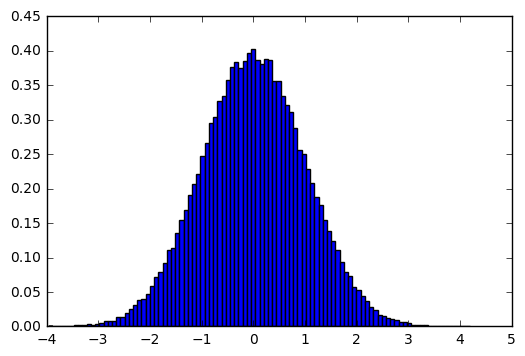

DescribeResult(nobs=100000, minmax=(-3.9573134095137732, 4.2006712303166012), mean=0.00098570899613788796, variance=1.0013276564649136, skewness=-0.002926317021523457, kurtosis=-0.030292593794573275)


In [39]:
random = stats.norm.rvs(size=100000, random_state=1234)
plt.hist(random, bins=100, normed=True)
plt.show()
print(stats.describe(random))

In [40]:
# Recall kurtosis - positive is thinner, negative, is wider
# Recall skewness - positive is to the left, negative is to the right

Lecture 4.1 in the lecture notes (do this second, after the lab)

In [41]:
# Let's do a simple t test (used when sample size < 30 and population sd is unknown)
# this is heights in cms, given a known population mean but an unknown population sd
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
population_mean=175.3

(array([ 0.07633588,  0.        ,  0.        ,  0.        ,  0.        ,
         0.30534351,  0.07633588,  0.07633588,  0.07633588,  0.15267176]),
 array([ 169.6 ,  170.91,  172.22,  173.53,  174.84,  176.15,  177.46,
         178.77,  180.08,  181.39,  182.7 ]),
 <a list of 10 Patch objects>)

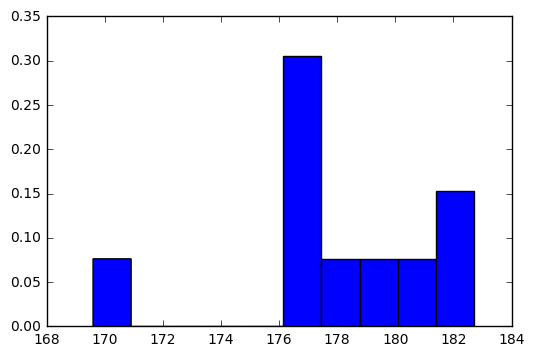

In [42]:
plt.hist(one_sample_data, normed=True)

In [43]:
# mean - using scipy mean is the same as numpy both in calculation and performance so no added value
import scipy
print(scipy.mean(one_sample_data))
print(np.mean(one_sample_data))

177.96
177.96


In [44]:
print(scipy.std(one_sample_data))
print(np.std(one_sample_data))

3.47626236064
3.47626236064


In [31]:
# So how is the t-statistic calculated?
# (sample mean - population mean)/(sd of sample / sqrt of population size)
# the number of degrees of freedom of the t distribution is n-1 so this is why we force the std to use this
# rather than the numpy/scipy default which would be n instead of n-1
t_statistic=(np.mean(one_sample_data)-population_mean)/((np.std(one_sample_data, ddof=1))/(np.sqrt(len(one_sample_data))))
print(t_statistic)

2.29556896808


In [32]:
# survival function (sf) tells us 1 - cdf i.e. the probability to the right of the t statistic
# (on two sides in this case so we double the value) - note degrees of freedom required to go from t_stat to p_value
p_value=stats.distributions.t.sf(np.abs(t_statistic), (len(one_sample_data)-1)) * 2
print(p_value)

0.0473413733975


In [45]:
# this function returns the same two sided test with one line
one_sample = stats.ttest_1samp(one_sample_data, population_mean)

In [46]:
print("--")
print(one_sample)
print("--")
print("The t-statistic is %.3f and the p-value is %.3f." % one_sample)
print("--")

--
Ttest_1sampResult(statistic=2.2955689680831828, pvalue=0.04734137339747034)
--
The t-statistic is 2.296 and the p-value is 0.047.
--


In [35]:
# For z statistic test, consider eg 
population_mean=175.3
population_sd=6.23
sample_size=100
sample_mean=174.2
z_statistic=(sample_mean-population_mean)/(population_sd/(np.sqrt(sample_size)))
# note the sample size is not a parameter in calculating the p value - degrees of freedom not relevant for z test
p_value=stats.norm.sf(np.abs(z_statistic)) * 2
print(p_value)

0.0774545725707


In [47]:
# what if we want to compare two different samples
female_heights = [163.8, 156.4, 155.2, 158.5, 164.0, 151.6, 154.6, 171.0]
male_heights = [175.5, 183.9, 175.7, 172.5, 156.2, 173.4, 167.7, 187.9]

In [48]:
# This performs Welch's t-test for unequal variances of the two samples
two_sample = stats.ttest_ind(male_heights, female_heights, equal_var=False)
print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is 3.588 and the p-value is 0.004.


In [12]:
# break it down
# t_statistic=(mean1 - mean2)/sqrt((sd1**2/n1)+(sd2**2/n2))
t_statistic=(np.mean(female_heights)-np.mean(male_heights))/np.sqrt((np.var(female_heights, ddof=1)/len(female_heights))+(np.var(male_heights, ddof=1))/len(male_heights))
print(t_statistic)

-3.58752154254


In [25]:
# unfortunately degrees of freedom in this case is not straightforward!
var_fem=np.var(female_heights, ddof=1)
var_mal=np.var(male_heights, ddof=1)
dof_fem=len(female_heights)-1
dof_mal=len(male_heights)-1
num_fem=len(female_heights)
num_mal=len(male_heights)
degrees_of_freedom=(((var_fem/num_fem)+(var_mal/num_mal))**2)/(((var_fem**2)/(((num_fem**2)*dof_fem)))+(((var_mal)**2)/((num_mal**2)*dof_mal)))
print(degrees_of_freedom)

12.1368742113


In [26]:
p_value=stats.distributions.t.sf(np.abs(t_statistic), degrees_of_freedom) * 2
print(p_value)

0.00366705074373


# LECTURE 3 JOINS IN PANDAS

In [49]:
# concatenation

df_concat_1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df_concat_1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [50]:
df_concat_2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
df_concat_2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [51]:
result = pd.concat([df_concat_1, df_concat_2])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [52]:
df_concat_3 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[0, 1, 2, 3])
df_concat_3

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [53]:
result = pd.concat([df_concat_1, df_concat_3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [54]:
# if the index is not meaningful you might want to do this to keep it unique, but you 
# don't want to lose information by doing this so be careful about what the index means
# and whether it holds any information or whether it's simply a row number
result = pd.concat([df_concat_1, df_concat_2], ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [55]:
# merge (which is join)
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = raw_data.keys())
df_a

,subject_id,last_name,first_name
0,1,Anderson,Alex
1,2,Ackerman,Amy
2,3,Ali,Allen
3,4,Aoni,Alice
4,5,Atiches,Ayoung


In [56]:
raw_data = {
        'subject_id': ['6', '7', '8', '9', '10'],
        'first_name': ['Billy', 'John', 'Kenny', 'Charles', 'Sarah'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,6,Billy,Bonder
1,7,John,Black
2,8,Kenny,Balwner
3,9,Charles,Brice
4,10,Sarah,Btisan


In [57]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '11', '12'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,11,61
9,12,16


In [58]:
# Merge with a left join. Left outer join produces a complete set 
# of records from Table A, with the matching records (where 
# available) in Table B. If there is no match, the right side will 
# contain null.

pd.merge(df_a, df_n, on=['subject_id'], how='left')

,subject_id,last_name,first_name,test_id
0,1,Anderson,Alex,51
1,2,Ackerman,Amy,15
2,3,Ali,Allen,15
3,4,Aoni,Alice,61
4,5,Atiches,Ayoung,16


In [111]:
pd.merge(df_b, df_n, on=['subject_id'], how='left')

,subject_id,first_name,last_name,test_id
0,6,Billy,Bonder,NaN
1,7,John,Black,14.0
2,8,Kenny,Balwner,15.0
3,9,Charles,Brice,1.0
4,10,Sarah,Btisan,NaN


In [112]:
# Merge with a right join produces a complete set of records 
# from df_b, with the matching records (where available) in df_a. 
# If there is no match, the left side will contain null.

pd.merge(df_a, df_n, on=['subject_id'], how='right')

,subject_id,last_name,first_name,test_id
0,1,Anderson,Alex,51
1,2,Ackerman,Amy,15
2,3,Ali,Allen,15
3,4,Aoni,Alice,61
4,5,Atiches,Ayoung,16
5,7,NaN,NaN,14
6,8,NaN,NaN,15
7,9,NaN,NaN,1
8,11,NaN,NaN,61
9,12,NaN,NaN,16


In [113]:
pd.merge(df_b, df_n, on=['subject_id'], how='right')

,subject_id,first_name,last_name,test_id
0,7,John,Black,14
1,8,Kenny,Balwner,15
2,9,Charles,Brice,1
3,1,NaN,NaN,51
4,2,NaN,NaN,15
5,3,NaN,NaN,15
6,4,NaN,NaN,61
7,5,NaN,NaN,16
8,11,NaN,NaN,61
9,12,NaN,NaN,16


In [103]:
# An outer join produces the set of all records in df_a and df_b, 
# with matching records from both sides where available. If there 
# is no match, the missing side will contain null.

pd.merge(df_b, df_n, on=['subject_id'], how='outer')

,subject_id,first_name,last_name,test_id
0,6,Billy,Bonder,NaN
1,7,Brian,Black,14.0
2,8,Bran,Balwner,15.0
3,9,Bryce,Brice,1.0
4,12,Betty,Btisan,NaN
5,1,NaN,NaN,51.0
6,2,NaN,NaN,15.0
7,3,NaN,NaN,15.0
8,4,NaN,NaN,61.0
9,5,NaN,NaN,16.0


In [114]:
# An inner join produces only the set of records that match in both 
# df_a and df_b. 

pd.merge(df_b, df_n, on=['subject_id'], how='inner')

,subject_id,first_name,last_name,test_id
0,7,John,Black,14
1,8,Kenny,Balwner,15
2,9,Charles,Brice,1


In [ ]:
# how to get all records for which we have both a subject_id and test_id all together in one table


In [ ]:
# what happens if columns exist in both tables but you do not include them in the "on" clause?
df=pd.merge(df_a, df_b)


In [60]:
df_a

,subject_id,last_name,first_name
0,1,Anderson,Alex
1,2,Ackerman,Amy
2,3,Ali,Allen
3,4,Aoni,Alice
4,5,Atiches,Ayoung


In [61]:
df_b

,subject_id,first_name,last_name
0,6,Billy,Bonder
1,7,John,Black
2,8,Kenny,Balwner
3,9,Charles,Brice
4,10,Sarah,Btisan


In [ ]:
# additional notes: you do joins one pair of tables at a time